# Exercise 1: Problems with mutable default values

Have a look a the ``print_something`` function defined below. What will it print when you execute it?

In [1]:
def print_something(something, other_things=[]):
    other_things.insert(0, something)
    for thing in other_things:
        print(thing)

print_something("something")

Now, execute the function againg, what will happen now? Why is this happening? Discuss!

Finally, fix the function so that you can still provide a list of other things to print as keyword arguments but so that the default value is not changed between separate invocations.




In [2]:
def print_something(something, other_things=None):
    if not other_things:
        other_things = []
    other_things.insert(0, something)
    for thing in other_things:
        print(thing)

print_something("something", ["something complete"])

# Exercise 2: Time complexity of container operations

In this exercise, we will be doing some simple experiments on the performance of the basic Python data containers.

## (a)

Complete the functions in the following 4 code cells to create a unified interface to perform operations on the different types of containers. Remember that you can use ``help(list)``, ``help(dict)``, or ``help(set)`` to figure out how to implement each function.

In [3]:
def create_list(n):
    """ Create a list containing integer elements 0 to n - 1. """
    result = []
    for i in range(n):
        result.append(i)
    return result

def create_dict(n):
    """ Create a dictionary mapping the numbers 0 to n - 1 to themselves."""
    result = {}
    for i in range(n):
        result[i] = i
    return result

def create_set(n):
    """ Create a set containing the numbers 0 to n - 1."""
    result = set()
    for i in range(n):
        result.add(i)
    return result

In [4]:
def insert_beginning_list(l, e):
    """Insert element e into list l at position 0."""
    l.insert(0, e)
    
def insert_beginning_dict(d, e):
    """Insert element e into dict d."""
    d[e] = e
    
def insert_beginning_set(s, e):
    """Iinsert element e einto set s"""
    s.add(e)

In [5]:
def insert_end_list(l, e):
    """Insert element e into list l at the end of the list."""
    l.append(e)
    
def insert_end_dict(d, e):
    """Insert element e into dict d."""
    d[e] = e
    
def insert_end_set(s, e):
    """Iinsert element e einto set s"""
    s.add(e)

In [6]:
def contains_list(l, e):
    """Determin whether element e is in list l."""
    return e in l
    
def contains_dict(d, e):
    """Determin whether element e is in dict d."""
    return e in d
    
def contains_set(s, e):
    """Determin whether element e is in set s."""
    return e in s

In [7]:
def remove_list(l, e):
    """Remove element e from list l."""
    l.remove(e)
    
def remove_dict(d, e):
    """Remove element e from dict d."""
    d.pop(e)
    
def remove_set(s, e):
    """Remove element e from set s."""
    s.discard(e)

## (b)

The two cells below compute benchmark for the functions you have defined above and display the result. How do the results for the different container compare? What do you think is the reason for that?

In [8]:
import random
import time
import numpy as np


def get_execution_time(create_function, function, length, n=10):
    timings = np.zeros(n)
    elements = random.sample(range(length), n)
    object = create_function(length)
    for i, element in enumerate(elements):
        start = time.process_time()
        function(object, element)
        end = time.process_time()
        timings[i] = end - start
    return timings.mean()

def calculate_timings(what, lengths):
    results = {}
    names = ["Insertion (beginning)",
             "Insertion (end)",
             "Membership",
             "Removal"]
    prefixes = ["insert_beginning_",
                "insert_end_",
                "contains_",
                "remove_"]
    for length in lengths:
        for name, prefix in zip(names, prefixes):
            
            create_function = globals()["create_" + what]
            function = globals()[prefix + what]
            result = results.setdefault(name, [])
            time = get_execution_time(create_function,
                                      function,
                                      length)
            result.append(time)
    return results

lengths = [10 ** 3, 10 ** 4, 10 ** 5, 10 ** 6]
results_list = calculate_timings("list", lengths)
results_dict = calculate_timings("dict", lengths)
results_set = calculate_timings("set", lengths)

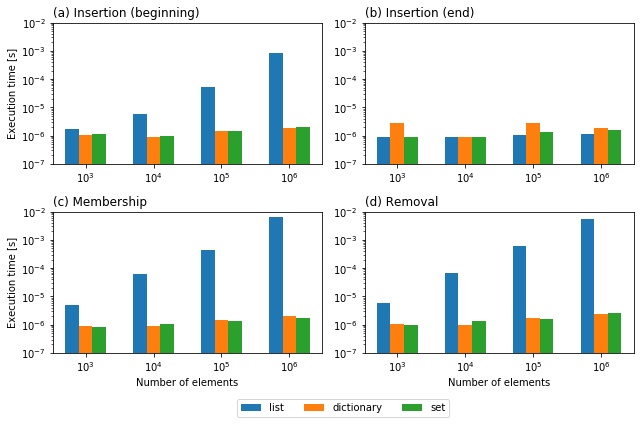

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

grid = GridSpec(3, 2, height_ratios = [1.0, 1.0, 0.1])
f = plt.figure(figsize=(9, 6))

x = np.arange(4)
width = 0.2

for i, key in enumerate(results_list):
    ax = plt.subplot(grid[i // 2, i % 2])
    patches_list = ax.bar(x - width, results_list[key], width=width)
    patches_dict = ax.bar(x, results_dict[key], width=width)
    patches_set = ax.bar(x + width, results_set[key], width=width)
    
    ax.set_xticks(x)
    xlabels = [f"$10^{{{int(np.log10(x))}}}$" for x in lengths]
    ax.set_xticklabels(xlabels)
    ax.set_yscale("log")
    if i > 1: ax.set_xlabel("Number of elements")
    if not i % 2: ax.set_ylabel("Execution time [s]")
    ax.set_ylim([1e-7, 1e-2])
    letter = chr(ord("a") + i)
    ax.set_title(f"({letter}) {key}", loc="left")
    
legend_ax = plt.subplot(grid[2, :])
legend_ax.set_axis_off()
patches = [patches_list[0], patches_dict[0], patches_set[0]]
labels = ["list", "dictionary", "set"]
legend_ax.legend(handles=patches, labels=labels, ncol=3, loc="center")

plt.tight_layout()
plt.savefig("figures/timings.pdf")

## Exercise 3: How to shoot yourself in the foot

Two weeks ago, the following bug report was filed on GitHub describing a bug occurring in code that I wrote:


<img src="figures/arts_bug.png" alt="arts bug" width=800>


The bug was caused by creating a variable object with the name ``np``. The bug was not very hard to find although it was located in a completely different module, than the error came from. The offending code and corresponding error message is shown below. Can you figure out why this function may cause problems when the ``name`` keyword agument is ``np``?

````Python
    import pyarts.workspace.variables as variables

    def create(self, ws, name=None):
        """
        Calls to <Group>Create WSMs are handled differently. This method simply
        determines the group type from the function name and then add a variable of
        this type to the workspace ws. A handle of this variable is then added to
        as attribute to the arts.workspace.variables module.

        Args:
            ws(Workspace): Workspace object to add the variable to
            name(str):     Name of the variable to add to the workspace
        """
        group = WorkspaceMethod.create_regexp.match(self.name).group(1)
        group_id = group_ids[group]
        wsv = WorkspaceVariable(ws_id, name, group, "User defined variable.", ws)
        setattr(variables, name, wsv)
        return wsv
````

````
Traceback (most recent call last):
  File "/workspace/variables.py", line 357, in value
    return np.asarray(self)
AttributeError: 'WorkspaceVariable' object has no attribute 'asarray'
````

## Exercise 4: Extracting figures from a LatTex file.

The code in the cell below downloads a manuscript of mine as ``.tex`` file and stores it in the ``text`` variables. Use regular expressions to extract the names of all image file included in the manuscript.

### Hints:
- You can use the ``re.Pattern.finditer`` method to iterate over matches in ``text``. Use ``help(re.Pattern.finditer)`` for more information.
- Use ``re.compile(..., re.MULTILINE)`` to enable multi-line mode when compiling your regular
  expresison. This allows you to match the beginning of a line using ``^``. This is useful to
  avoid matching the two commented figures in the manuscript.
- If you arrive at the correct solution you should find the names of 17 image files.

In [10]:
import urllib
url = "https://raw.githubusercontent.com/simonpf/mcrf/master/article/amt_manuscript_revised_2.tex"
request = urllib.request.Request(url)
with urllib.request.urlopen(request) as response:
    text = response.read().decode()


In [11]:
import re
expr = r"^[^%\n]*\\includegraphics\[([^\]]*)\][^\{]*\{([^\}]*)\}"
regexp = re.compile(expr, re.MULTILINE)
for i, m in enumerate(regexp.finditer(text)):
    print(f"Figure {i + 1}:", m.group(2))

Figure 1: ../plots/scene_overview.png
Figure 2: ../plots/gem_psds.png
Figure 3: ../plots/retrieval_sketch
Figure 4: ../plots/particle_properties_d14
Figure 5: ../plots/contours
Figure 6: ../plots/observations_a
Figure 7: ../plots/results_a_LargePlateAggregate
Figure 8: ../plots/results_scatter_a
Figure 9: ../plots/results_box
Figure 10: ../plots/results_nd_a_LargePlateAggregate
Figure 11: ../plots/results_nd_scatter_a
Figure 12: ../plots/dfs
Figure 13: ../plots/misfits
Figure 14: ../plots/results_cw_b_LargePlateAggregate
Figure 15: ../plots/dfs_ratios
Figure 16: ../plots/results_b_LargePlateAggregate
Figure 17: ../plots/results_scatter_b
